In [2]:
import pandas as pd
import plotly.express as px
from io import StringIO

df = pd.read_csv('./multi_syn_output.txt')
df["p"] = df['p'].astype(int)
df["p_n_pair"] = df.apply(lambda row: f"({row['p']}, {row['n']})", axis=1)

# Separate data for low and high entropy
df_low = df[df["entropy"] == "l"]
df_high = df[df["entropy"] == "h"]

# Create line plot for low entropy with (p, n) pair as the legend label
fig_low = px.line(df_low, x="capacity", y="loss_rate", color="p_n_pair", markers=True,
                  title="Loss Rate vs Capacity (Low Entropy)",
                  labels={"loss_rate": "Loss Rate (%)", "capacity": "Capacity", "p_n_pair": "(p, n) Pair"})

# Update layout settings
fig_low.update_layout(
    width=600,
    height=450,
    plot_bgcolor='white',
    
    legend=dict(
        title="",  # No legend title
        y=0.5,
        xanchor="left",
        x=1.02,
        font=dict(
            family="Arial",
            size=20
        ),
        borderwidth=1.5
    ),
    
    xaxis_title_font=dict(size=24),  # Increase x-axis title font size
    yaxis_title_font=dict(size=24)   # Increase y-axis title font size

)

fig_low.update_xaxes(gridcolor='lightgrey', gridwidth=1)
fig_low.update_yaxes(gridcolor='lightgrey', gridwidth=1)
fig_low.add_shape(
    type="rect",
    xref="paper",
    yref="paper",
    x0=0,
    y0=0,
    x1=1.0,
    y1=1.0,
    line=dict(color="lightgrey", width=1)
)

# Show the plot
fig_low.write_image('loss_rate_vs_capacity.pdf')

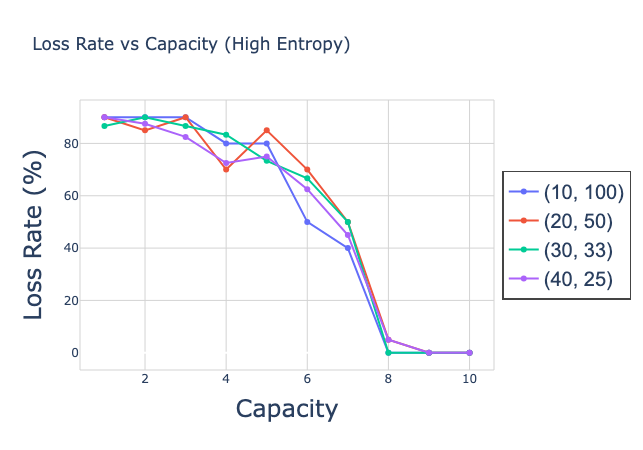

In [31]:
# Create line plot for high entropy
fig_high = px.line(df_high, x="capacity", y="loss_rate", color="p_n_pair", markers=True,
                   title="Loss Rate vs Capacity (High Entropy)",
                   labels={"loss_rate": "Loss Rate (%)", "capacity": "Capacity", "p_n_pair": "(p, n) Pair"})

# Update layout settings
fig_high.update_layout(
    width=600,
    height=450,
    plot_bgcolor='white',
    
    legend=dict(
        title="",  # No legend title
        y=0.5,
        xanchor="left",
        x=1.02,
        font=dict(
            family="Arial",
            size=20
        ),
        borderwidth=1.5
    ),
    
    xaxis_title_font=dict(size=24),  # Increase x-axis title font size
    yaxis_title_font=dict(size=24)   # Increase y-axis title font size

)

fig_high.update_xaxes(gridcolor='lightgrey', gridwidth=1)
fig_high.update_yaxes(gridcolor='lightgrey', gridwidth=1)
fig_high.add_shape(
    type="rect",
    xref="paper",
    yref="paper",
    x0=0,
    y0=0,
    x1=1.0,
    y1=1.0,
    line=dict(color="lightgrey", width=1)
)


# Show the plot
fig_high.show()